Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

#### This is a regression problem as the target variable is SalePrice

In [3]:
df.shape

(1168, 81)

In [4]:
#To get the details of all rows
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

#### Many columns have null values

#### Before treating Null values, doing the bivariate analysis

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

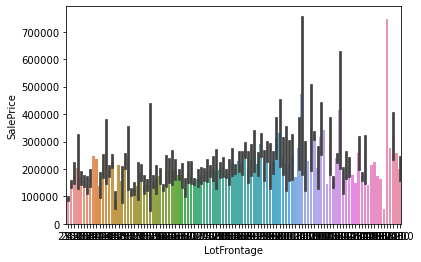

In [5]:
sns.barplot(x='LotFrontage',y='SalePrice',data=df)

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

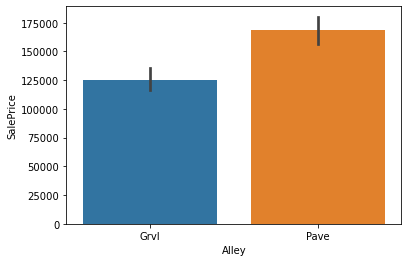

In [6]:
sns.barplot(x='Alley',y='SalePrice',data=df)

In [7]:
sns.barplot(x='MasVnrType',y='SalePrice',data=df)

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

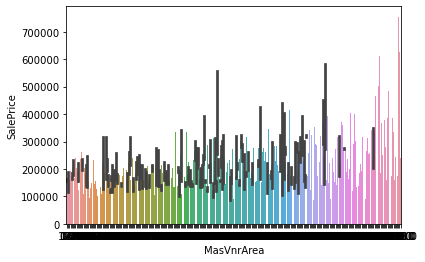

In [8]:
sns.barplot(x='MasVnrArea',y='SalePrice',data=df)

In [9]:
sns.barplot(x='BsmtQual',y='SalePrice',data=df)

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

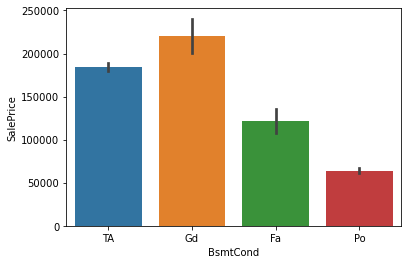

In [10]:
sns.barplot(x='BsmtCond',y='SalePrice',data=df)

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

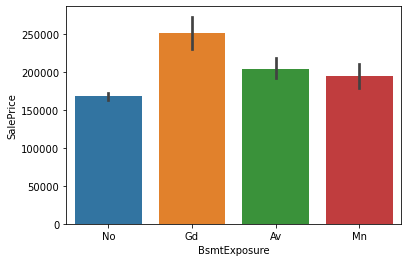

In [11]:
sns.barplot(x='BsmtExposure',y='SalePrice',data=df)

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

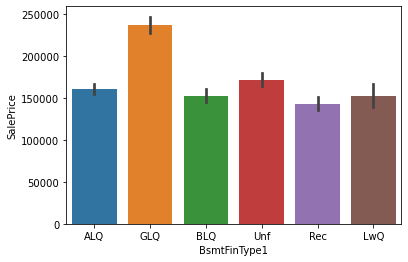

In [12]:
sns.barplot(x='BsmtFinType1',y='SalePrice',data=df)

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

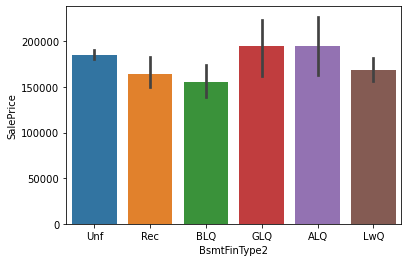

In [13]:
sns.barplot(x='BsmtFinType2',y='SalePrice',data=df)

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

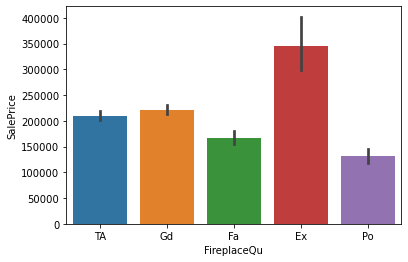

In [14]:
sns.barplot(x='FireplaceQu',y='SalePrice',data=df)

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

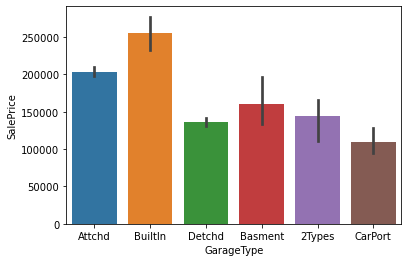

In [15]:
sns.barplot(x='GarageType',y='SalePrice',data=df)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

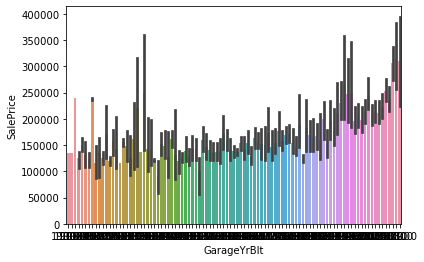

In [16]:
sns.barplot(x='GarageYrBlt',y='SalePrice',data=df)

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

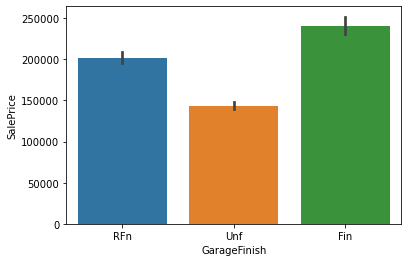

In [17]:
sns.barplot(x='GarageFinish',y='SalePrice',data=df)

#### Dropping the columns Alley,PoolQC,Fence,MiscFeature as most of the values are NaN

In [4]:
df = df.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],axis = 1)
df.shape

(1168, 77)

### Handling the null Values
#### Replacing empty values of Numerical columns with mean
#### Replacing empty values of Categorical columns with mode

In [5]:
df["LotFrontage"] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df["MasVnrArea"] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df["GarageYrBlt"] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

df["MasVnrType"] = df["MasVnrType"].fillna(df["MasVnrType"].mode()[0])
df["BsmtQual"] = df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])
df["BsmtCond"] = df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])
df["BsmtExposure"] = df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0])
df["BsmtFinType1"] = df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])
df["BsmtFinType2"] = df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])
df["FireplaceQu"] = df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])
df["GarageType"] = df["GarageType"].fillna(df["GarageType"].mode()[0])
df["GarageFinish"] = df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])
df["GarageQual"] = df["GarageQual"].fillna(df["GarageQual"].mode()[0])
df["GarageCond"] = df["GarageCond"].fillna(df["GarageCond"].mode()[0])

In [6]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

#### The Dataset is free from Null values

#### Splitting categorical variables and numerical variables

In [7]:
catcolumns = [column for column in df.columns if df[column].dtype=='object']
numcolumns = [column for column in df.columns if df[column].dtype!='object']
print("------------------- Categorical Columns------------------------------")
categorical = df[catcolumns]
print(categorical.head(2))

------------------- Categorical Columns------------------------------
  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      IR1         Lvl    AllPub    Inside       Mod   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      NPkVill       Norm       Norm  ...          TA        Typ          TA   
1        NAmes       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          Unf         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  

[2 rows x 39 columns]


#### Applying LabelEncoding technique to categorical variables

In [8]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for i in catcolumns:
    categorical[i]=lab_enc.fit_transform(categorical[i])
categorical.head(3)

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         0            3          0          4          0   
1         3       1         0            3          0          4          1   
2         3       1         0            3          0          1          0   

   Neighborhood  Condition1  Condition2  ...  KitchenQual  Functional  \
0            13           2           2  ...            3           6   
1            12           2           2  ...            2           6   
2            15           2           2  ...            3           6   

   FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0            4           1             1           4           4           2   
1            4           1             2           4           4           2   
2            4           1             2           4           4           2   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  

[3 rows x 39 columns]

In [9]:
numerical = df[numcolumns]

In [10]:
df = pd.concat([categorical,numerical],axis=1)
df.head(3)

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         0            3          0          4          0   
1         3       1         0            3          0          4          1   
2         3       1         0            3          0          1          0   

   Neighborhood  Condition1  Condition2  ...  WoodDeckSF  OpenPorchSF  \
0            13           2           2  ...           0          205   
1            12           2           2  ...          81          207   
2            15           2           2  ...         180          130   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   

   SalePrice  
0     128000  
1     268000  
2     269790  

[3 rows x 77 columns]

### EDA

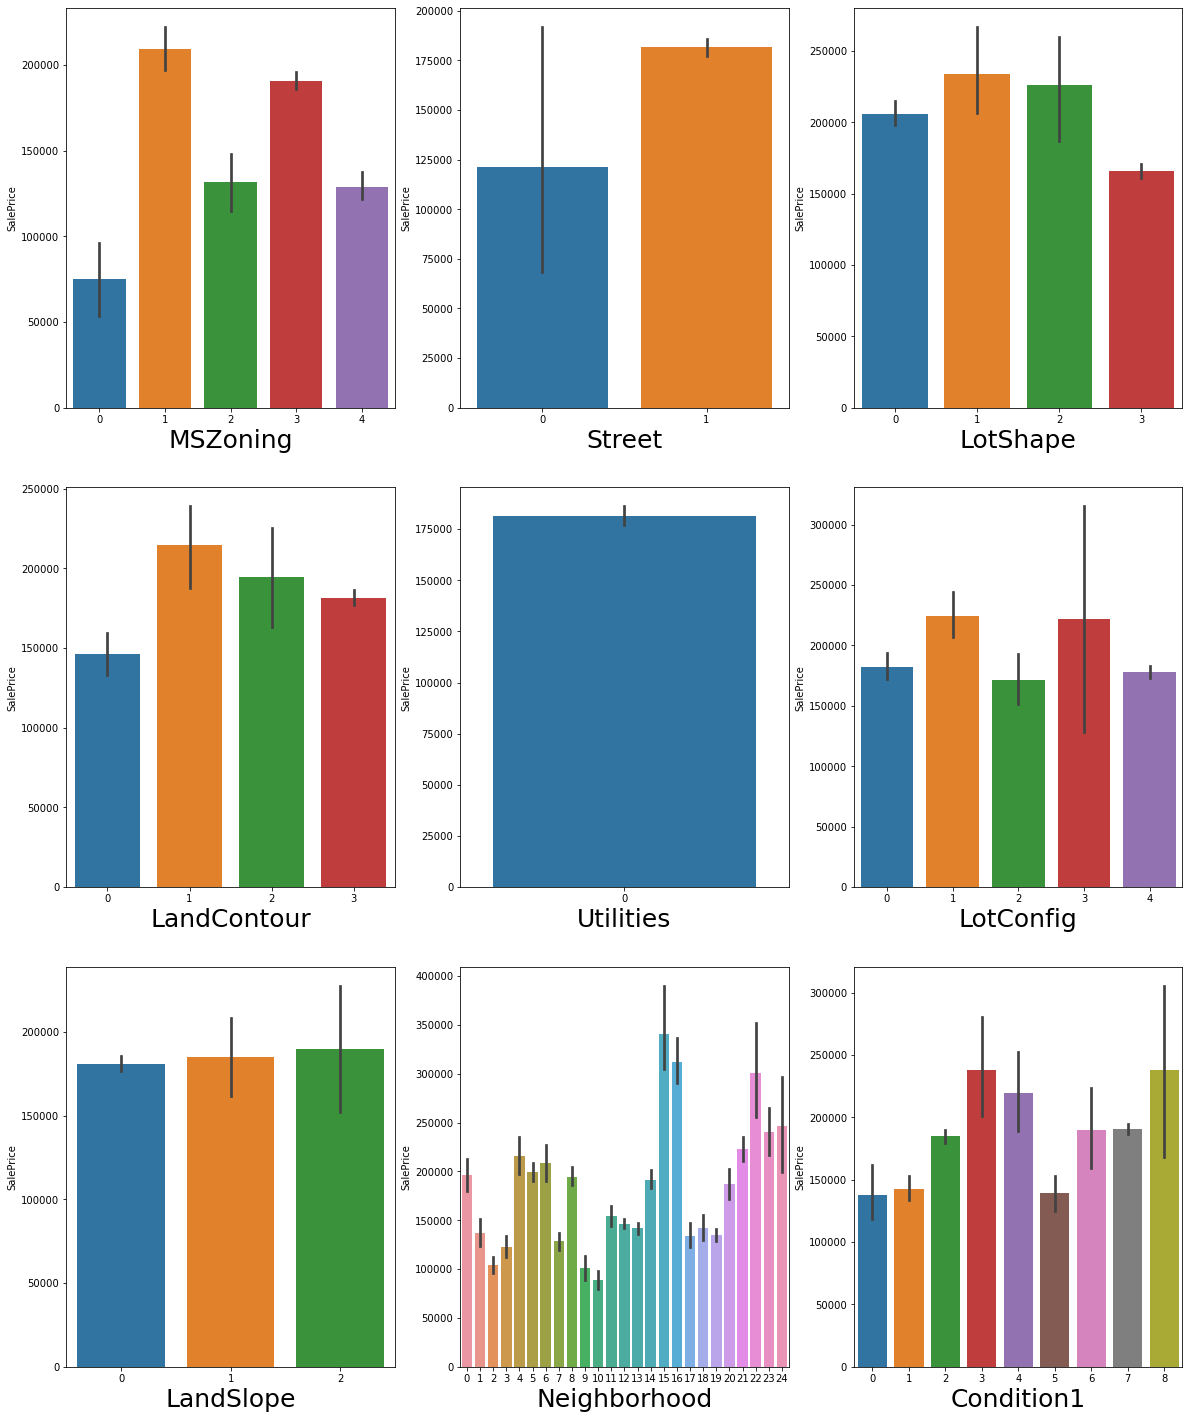

In [38]:
plt.figure(figsize=(20,25))
gr = 1
df1 = df.iloc[:,0:10]
for column in df1:
    if gr<=9:
        ax = plt.subplot(3,3,gr)
        sns.barplot(x = df1[column],y=df['SalePrice'],data=df)
        plt.xlabel(column,fontsize=25)
    gr+=1
plt.show()

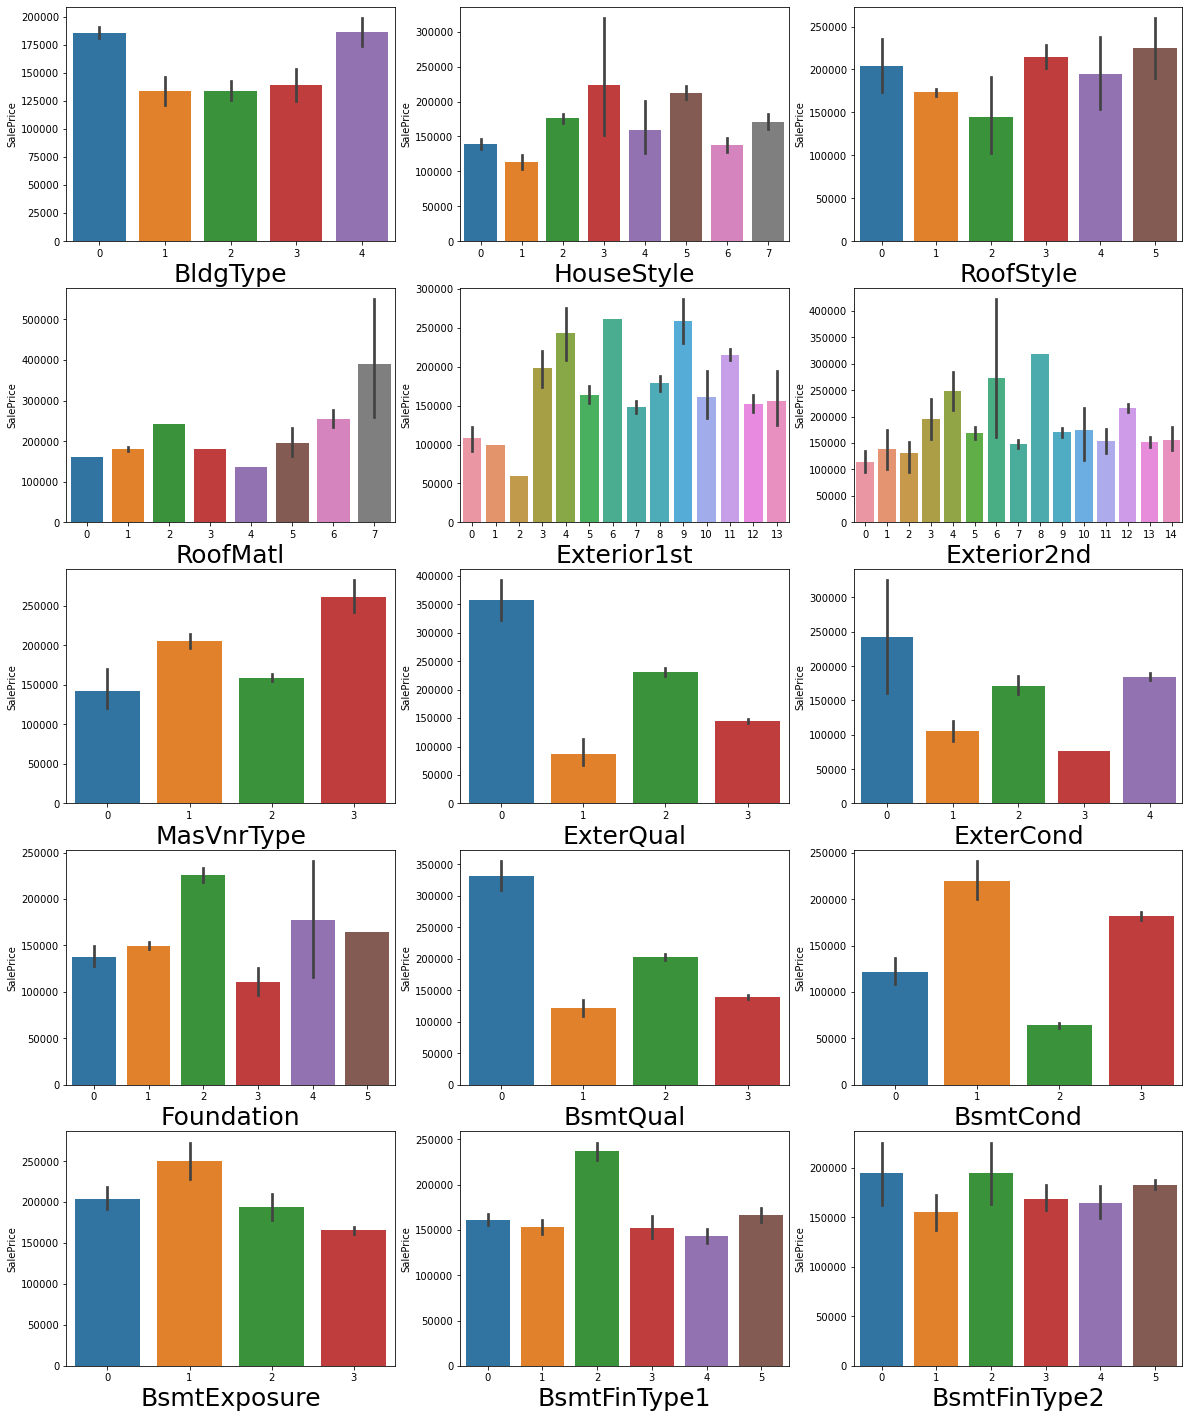

In [39]:
plt.figure(figsize=(20,25))
gr = 1
df2 = df.iloc[:,10:26]
for column in df2:
    if gr<=15:
        ax = plt.subplot(5,3,gr)
        sns.barplot(x = df2[column],y=df['SalePrice'],data=df)
        plt.xlabel(column,fontsize=25)
    gr+=1
plt.show()

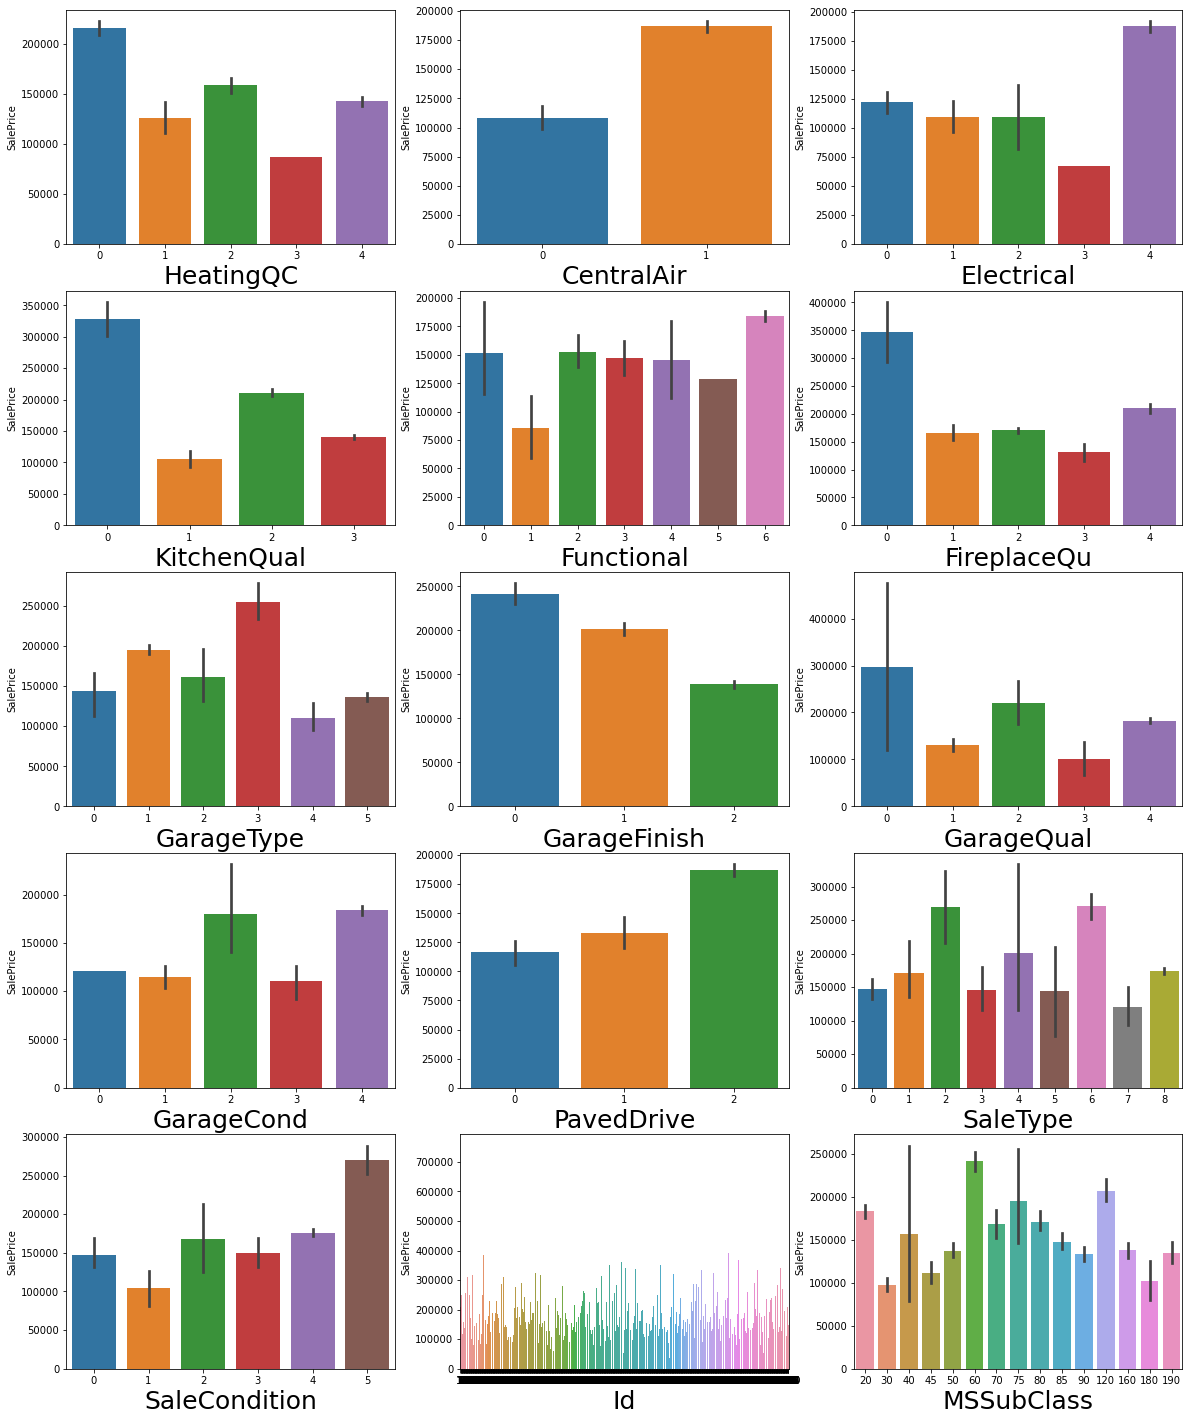

In [40]:
plt.figure(figsize=(20,25))
gr = 1
df3 = df.iloc[:,26:41]
for column in df3:
    if gr<=15:
        ax = plt.subplot(5,3,gr)
        sns.barplot(x = df3[column],y=df['SalePrice'],data=df)
        plt.xlabel(column,fontsize=25)
    gr+=1
plt.show()

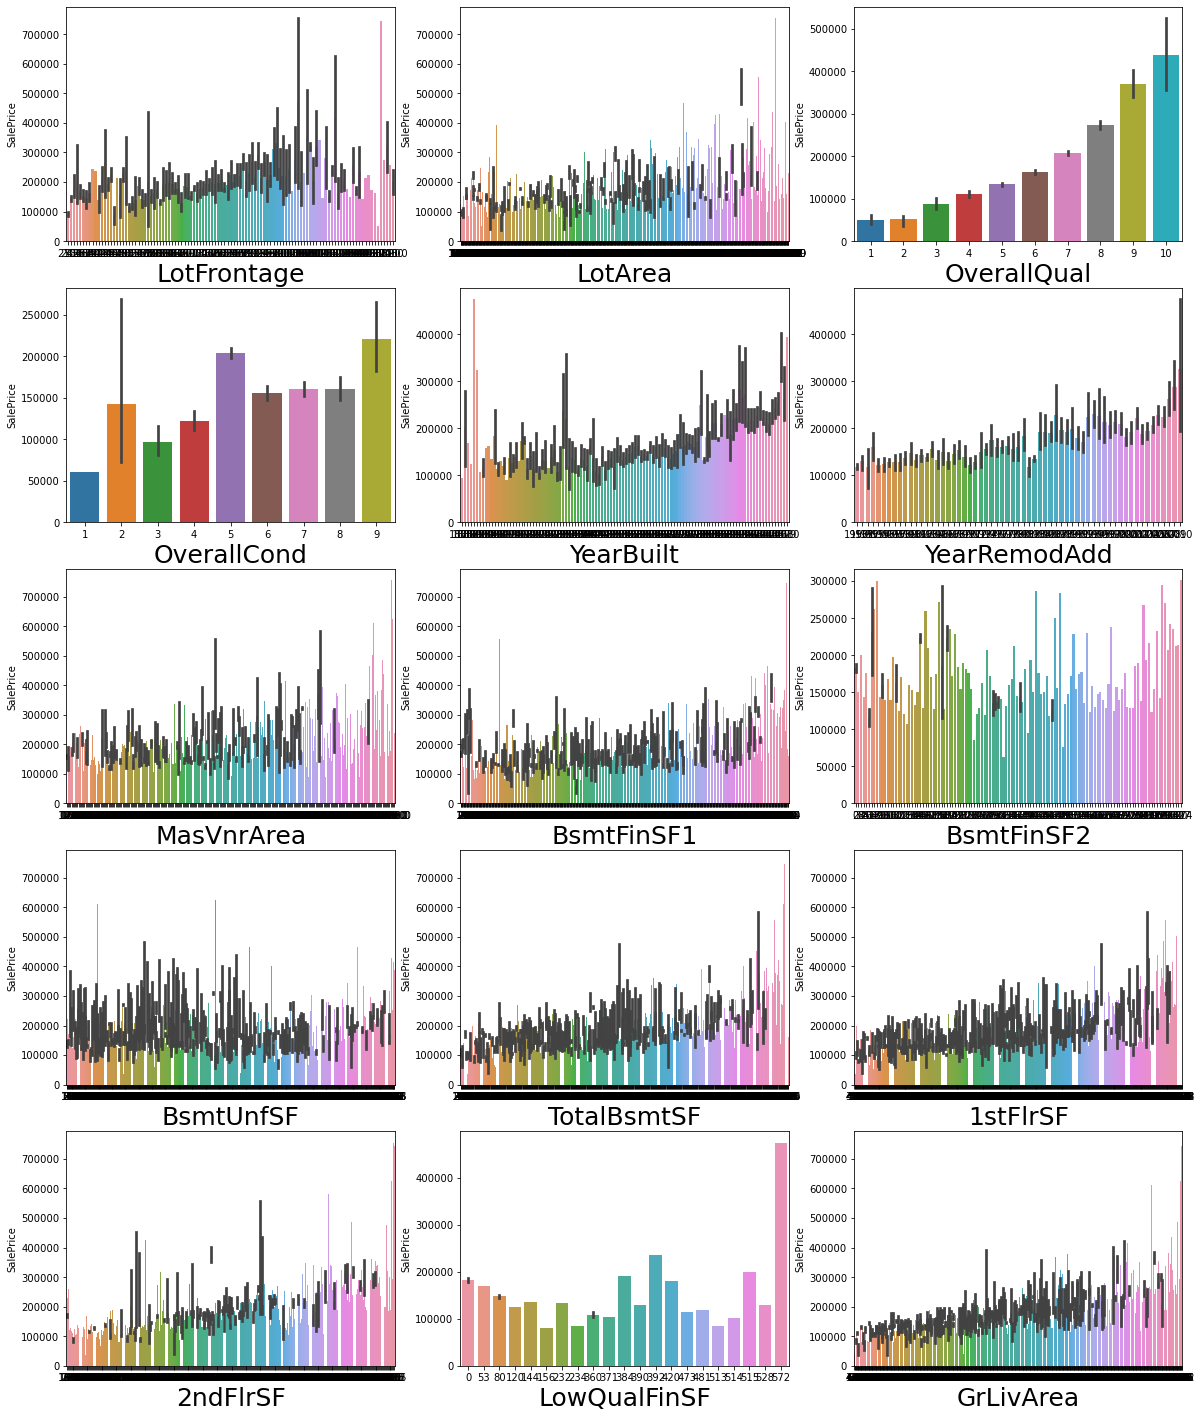

In [41]:
plt.figure(figsize=(20,25))
gr = 1
df4 = df.iloc[:,41:56]
for column in df4:
    if gr<=15:
        ax = plt.subplot(5,3,gr)
        sns.barplot(x = df4[column],y=df['SalePrice'],data=df)
        plt.xlabel(column,fontsize=25)
    gr+=1
plt.show()

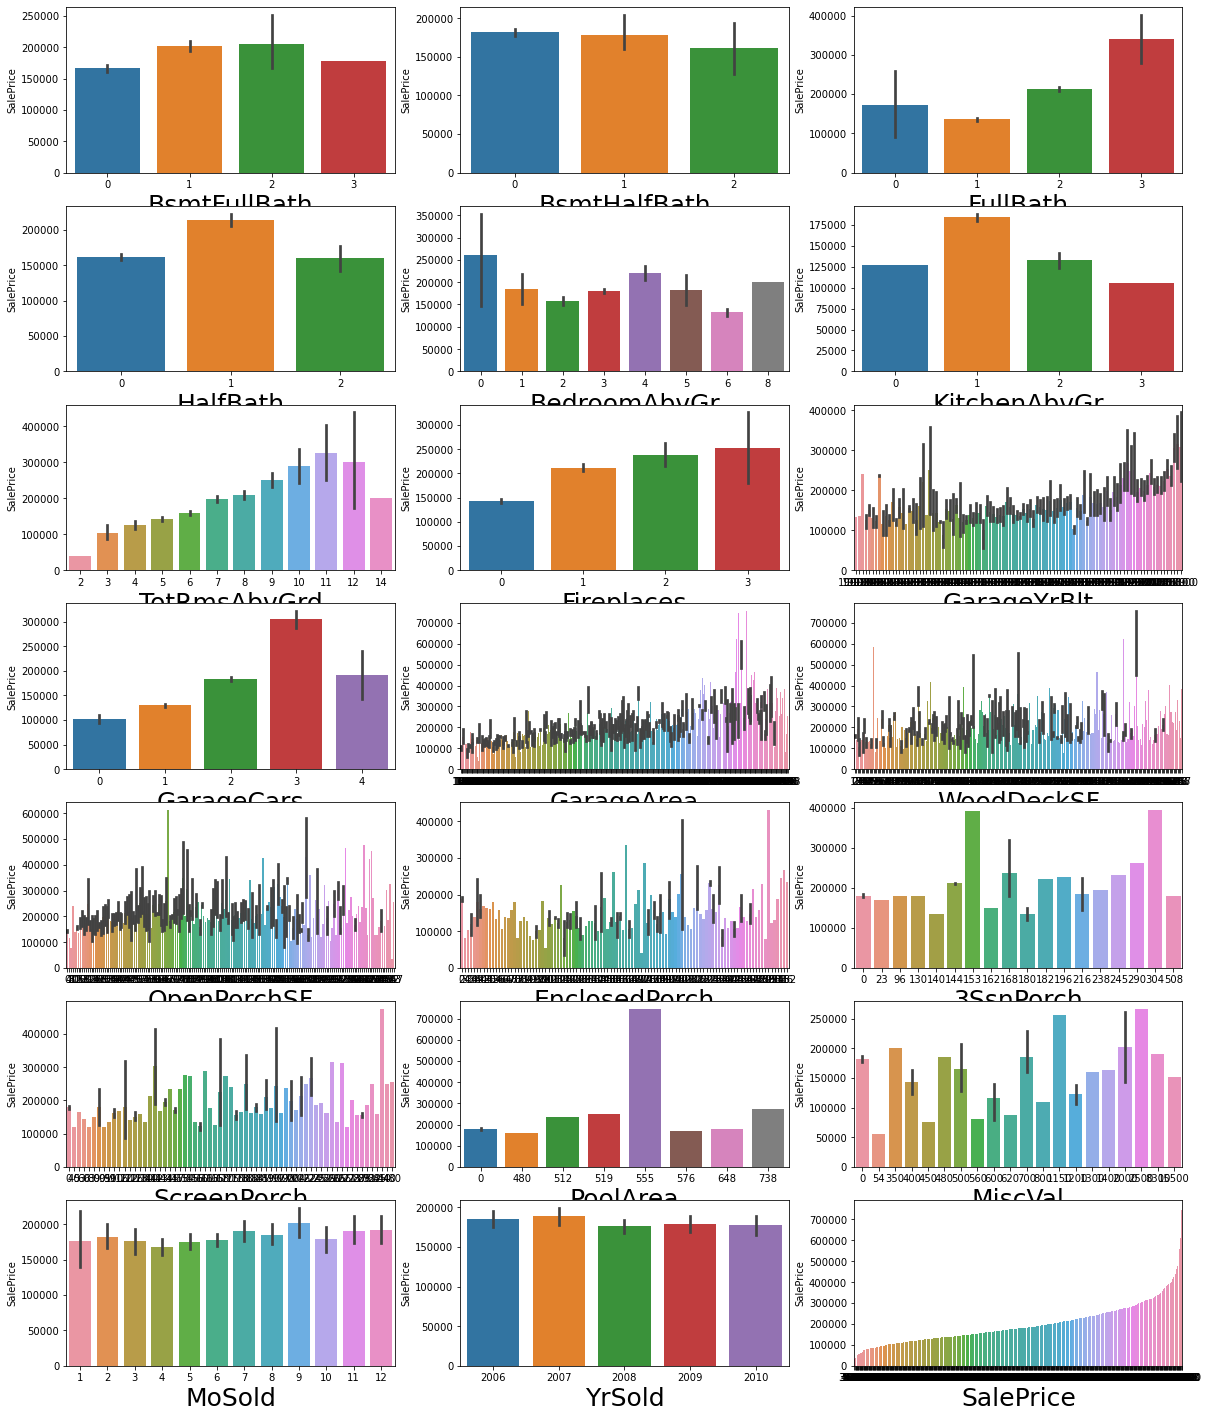

In [42]:
plt.figure(figsize=(20,25))
gr = 1
df4 = df.iloc[:,56:77]
for column in df4:
    if gr<=21:
        ax = plt.subplot(7,3,gr)
        sns.barplot(x = df4[column],y=df['SalePrice'],data=df)
        plt.xlabel(column,fontsize=25)
    gr+=1
plt.show()

#### Checking the correlation of feature variables with target variable

In [43]:
correlation = df.corr()
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.458007
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
GarageCond       0.135071
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
PoolArea    

#### Top factors which affect the saleprice is
 * OverallQual      
 * GrLivArea       
 * GarageCars       
 * GarageArea       
 * TotalBsmtSF      
 * 1stFlrSF         
 * FullBath         
 * TotRmsAbvGrd     
 * YearBuilt        
 * YearRemodAdd

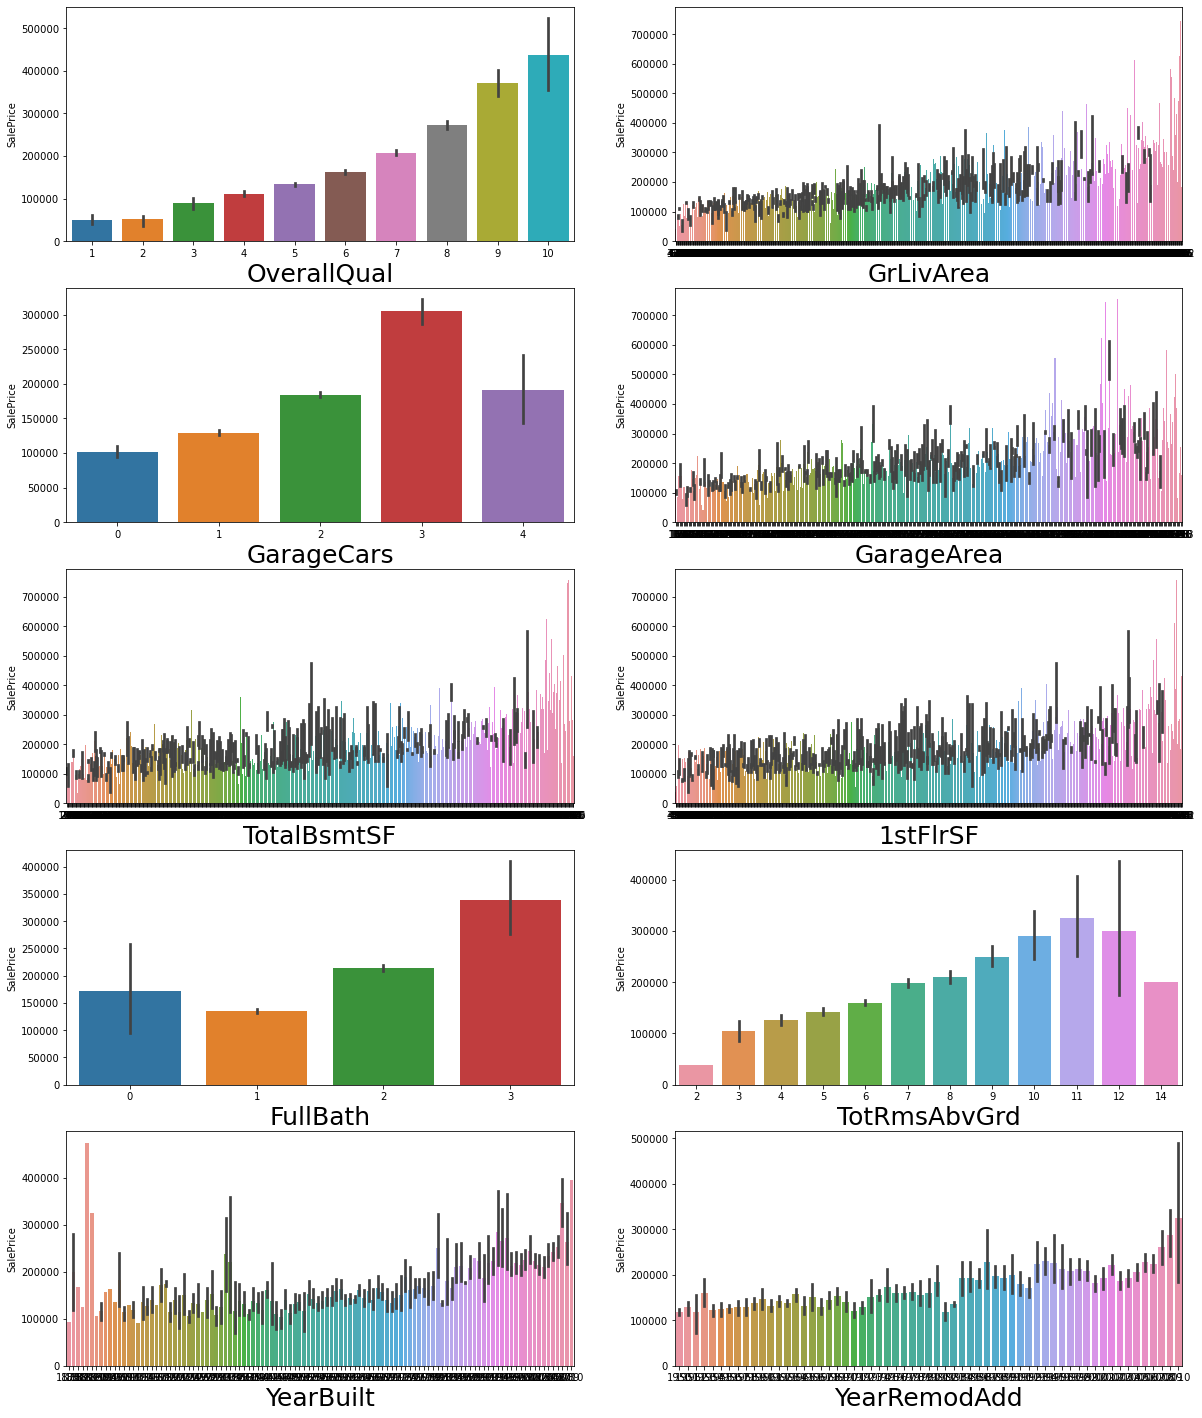

In [46]:
factors = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
pos_fact = df[factors]
plt.figure(figsize=(20,25))
gr = 1
for column in factors:
    if gr<=10:
        ax = plt.subplot(5,2,gr)
        sns.barplot(x = pos_fact[column],y=df['SalePrice'],data=df)
        plt.xlabel(column,fontsize=25)
    gr+=1
plt.show()

#### Checking for multicollinearity

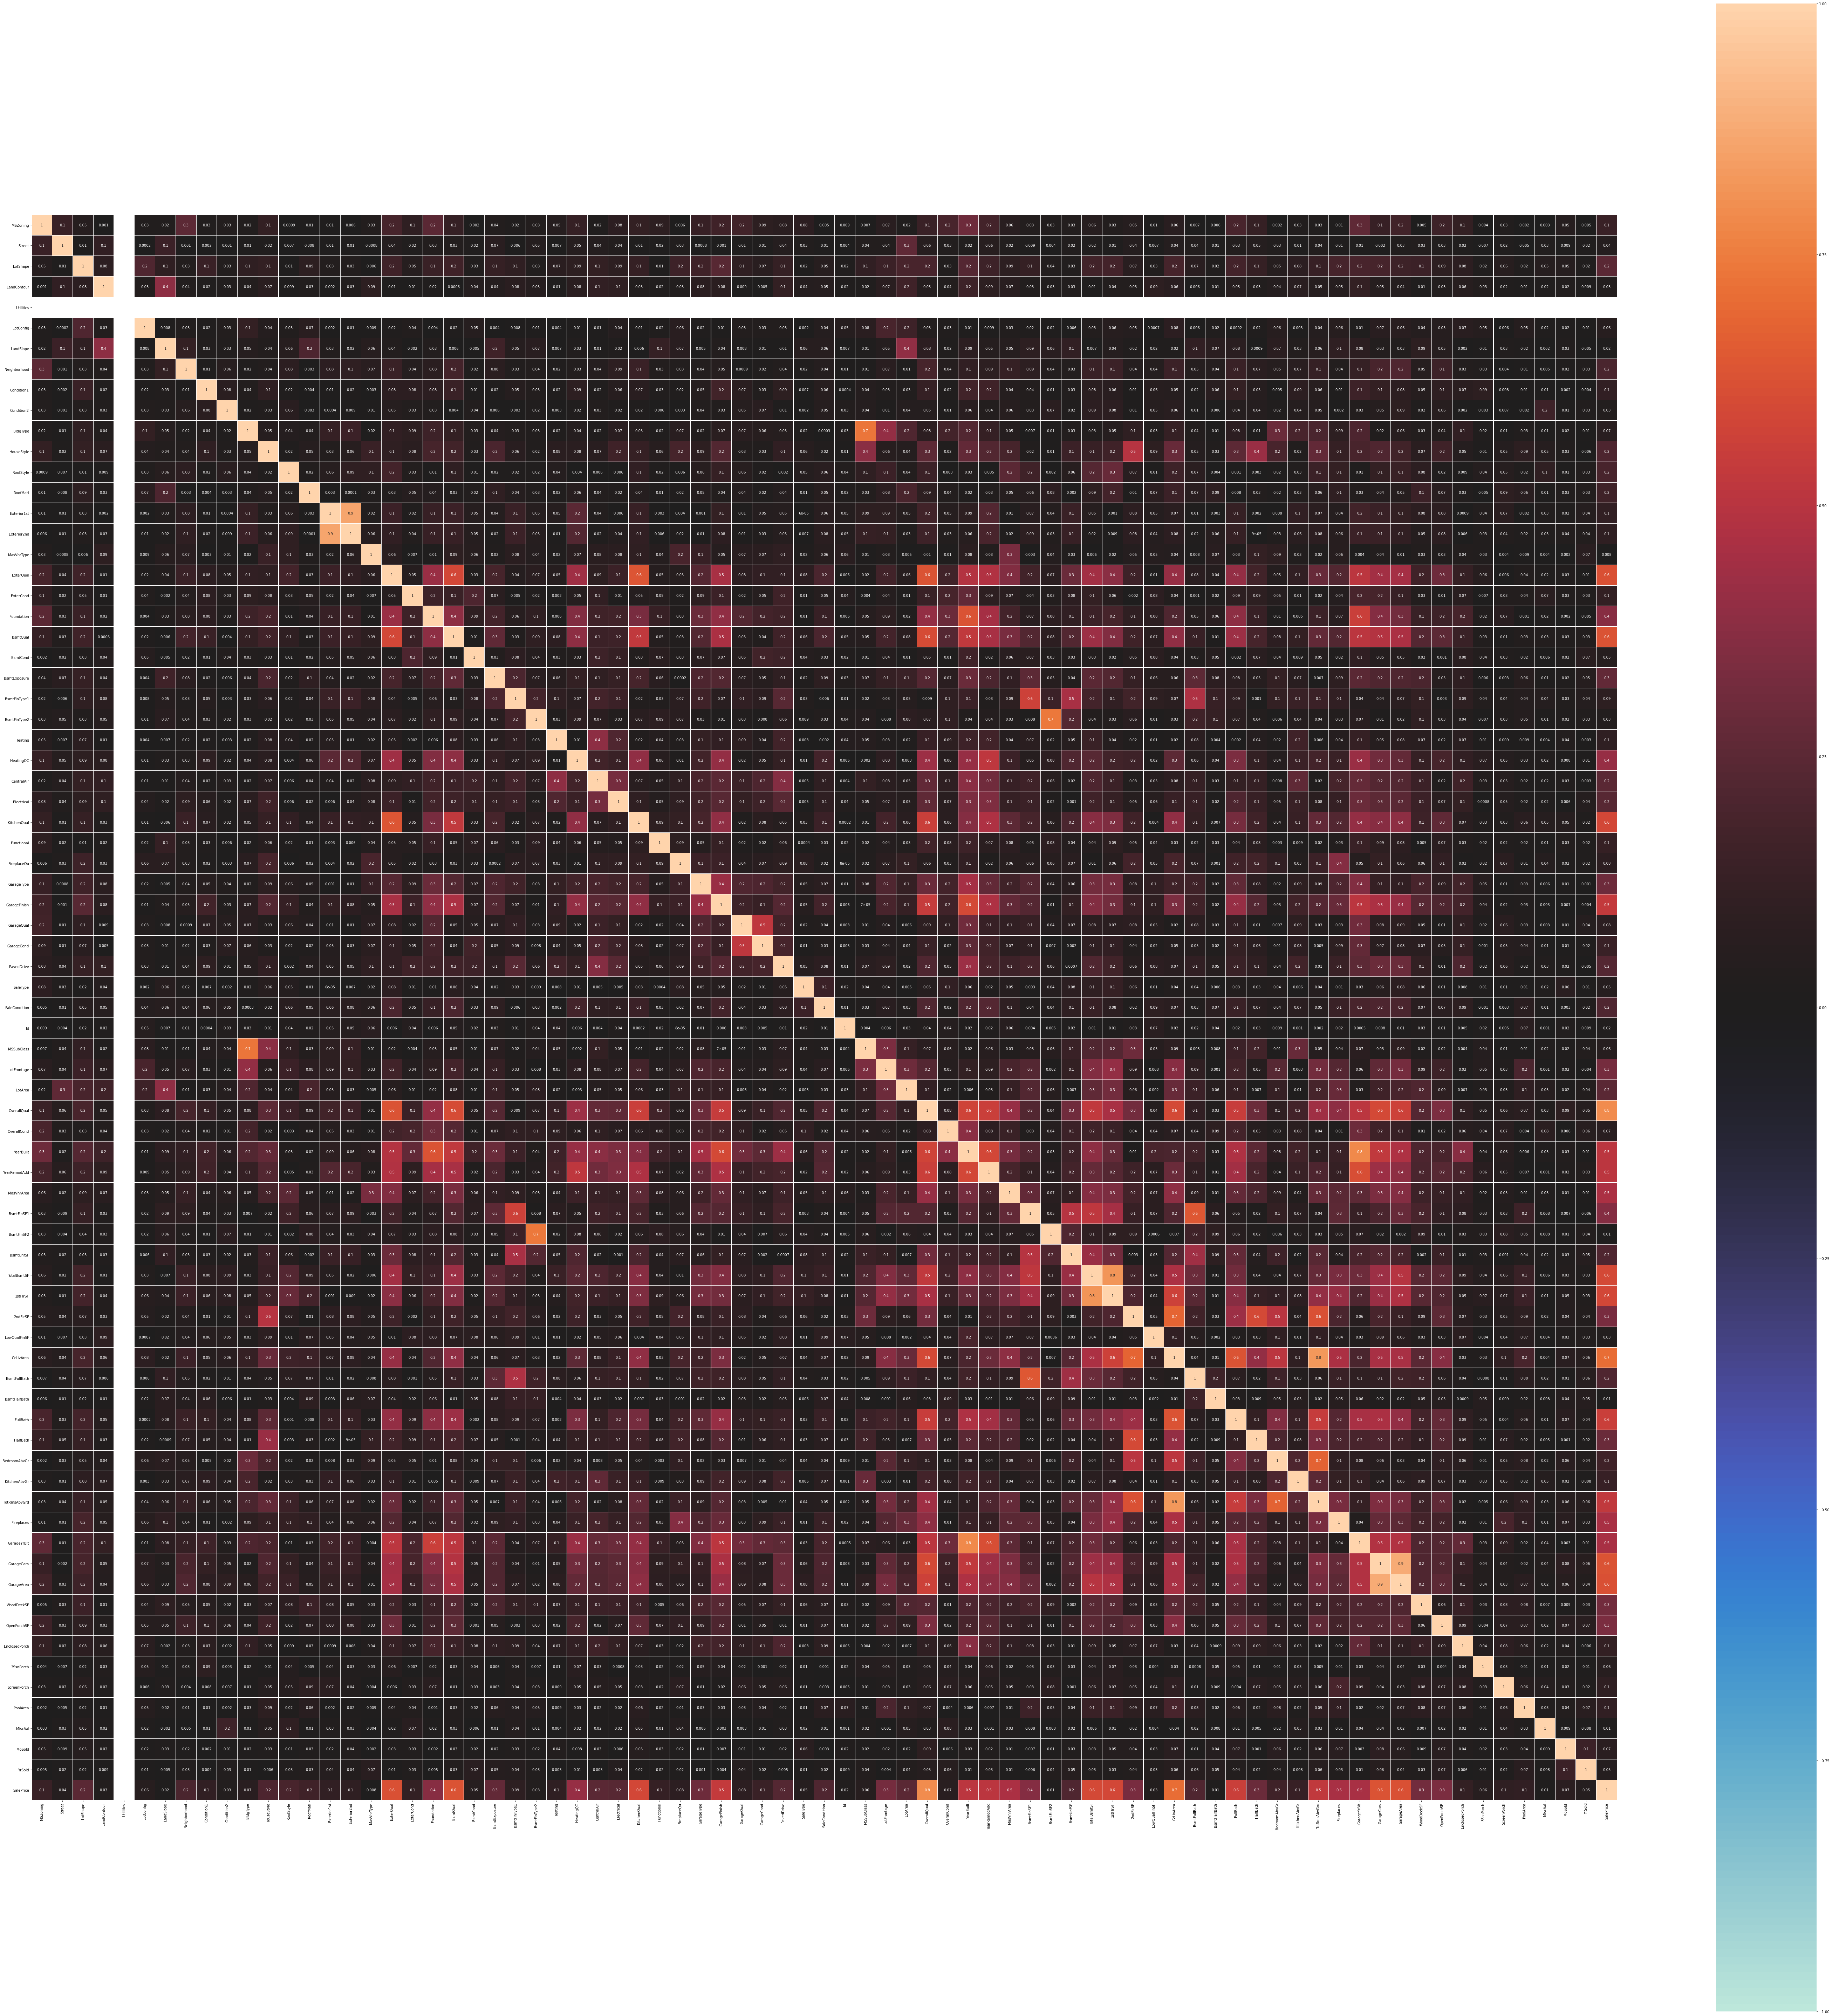

In [47]:
df_corr = df.corr().abs()
plt.figure(figsize=(80,80))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square = True,center=0,fmt='.1g',linewidth=.2)
plt.tight_layout()

#### From the heatmap its clear that multicollinearity exists in the dataset

#### Statistical analysis of the dataset

In [48]:
df.describe()

MSZoning       Street     LotShape  LandContour  Utilities  \
count  1168.000000  1168.000000  1168.000000  1168.000000     1168.0   
mean      3.013699     0.996575     1.938356     2.773973        0.0   
std       0.633120     0.058445     1.412262     0.710027        0.0   
min       0.000000     0.000000     0.000000     0.000000        0.0   
25%       3.000000     1.000000     0.000000     3.000000        0.0   
50%       3.000000     1.000000     3.000000     3.000000        0.0   
75%       3.000000     1.000000     3.000000     3.000000        0.0   
max       4.000000     1.000000     3.000000     3.000000        0.0   

         LotConfig    LandSlope  Neighborhood   Condition1   Condition2  ...  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  ...   
mean      3.004281     0.064212     12.145548     2.032534     2.005993  ...   
std       1.642667     0.284088      6.010364     0.871703     0.250035  ...   
min       0.000000     0.000000      0.000000     0.000000     0.000000  ...   
25%       2.000000     0.000000      7.000000     2.000000     2.000000  ...   
50%       4.000000     0.000000     12.000000     2.000000     2.000000  ...   
75%       4.000000     0.000000     17.000000     2.000000     2.000000  ...   
max       4.000000     2.000000     24.000000     8.000000     7.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 77 columns]

#### Outliers exists in the dataset

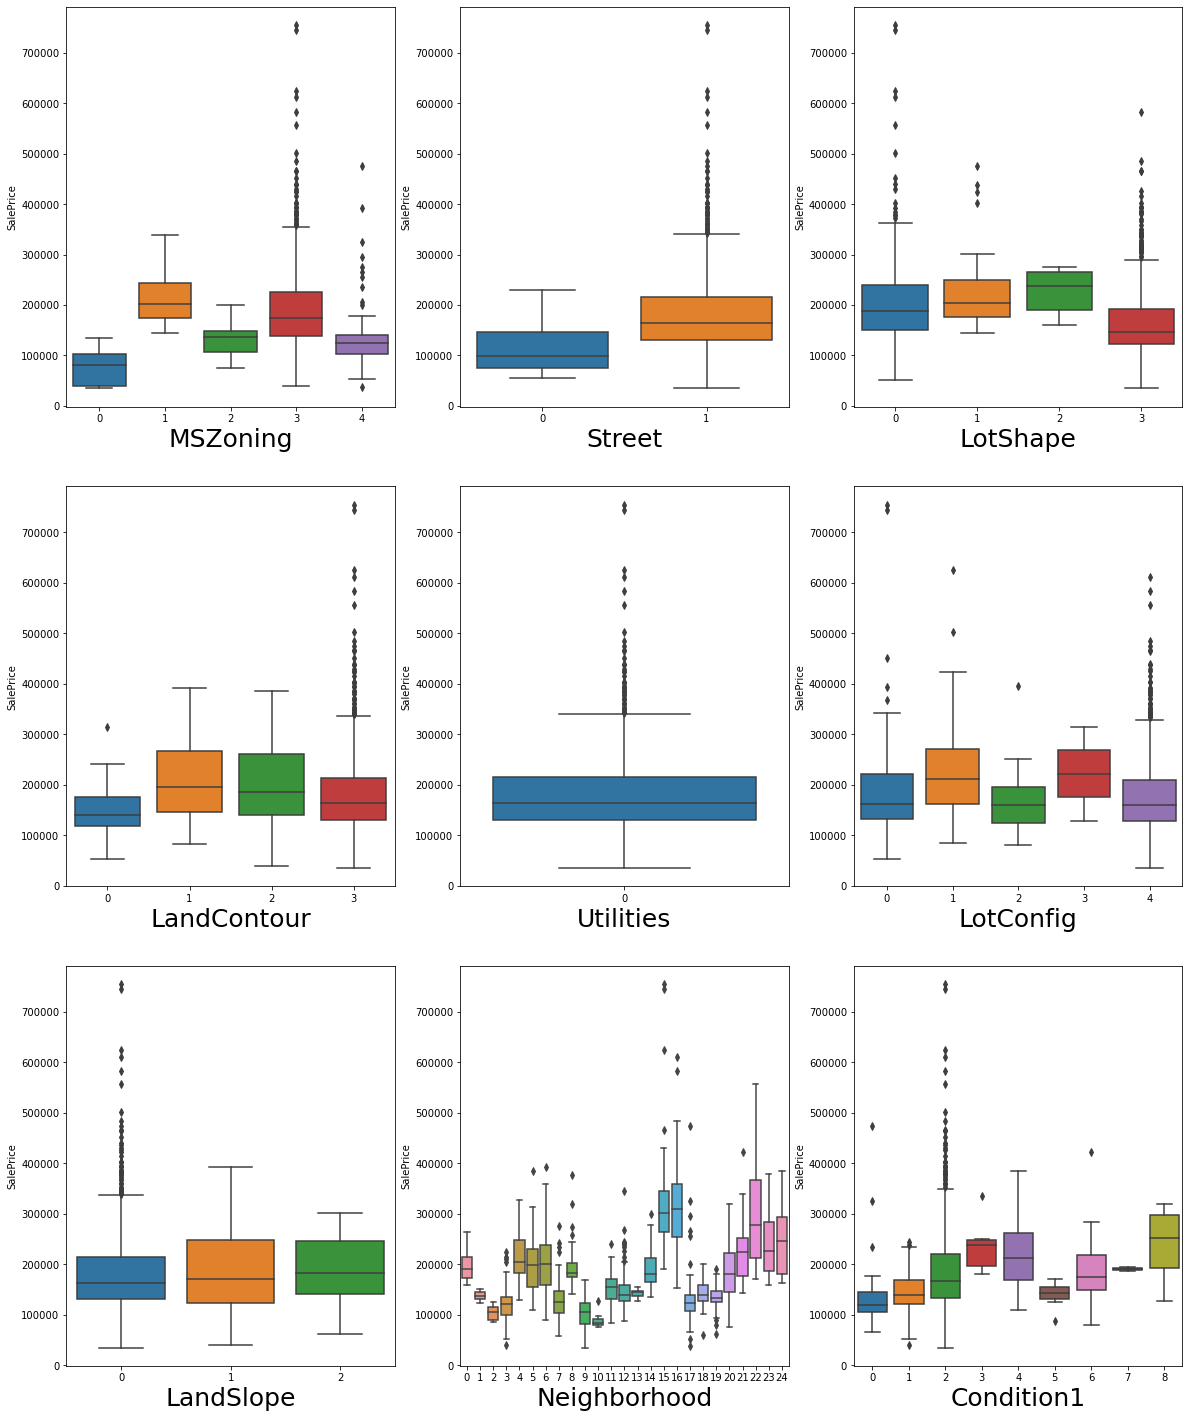

In [49]:
plt.figure(figsize=(20,25))
gr = 1
df1 = df.iloc[:,0:10]
for column in df1:
    if gr<=9:
        ax = plt.subplot(3,3,gr)
        sns.boxplot(x = df1[column],y=df['SalePrice'],data=df)
        plt.xlabel(column,fontsize=25)
    gr+=1
plt.show()

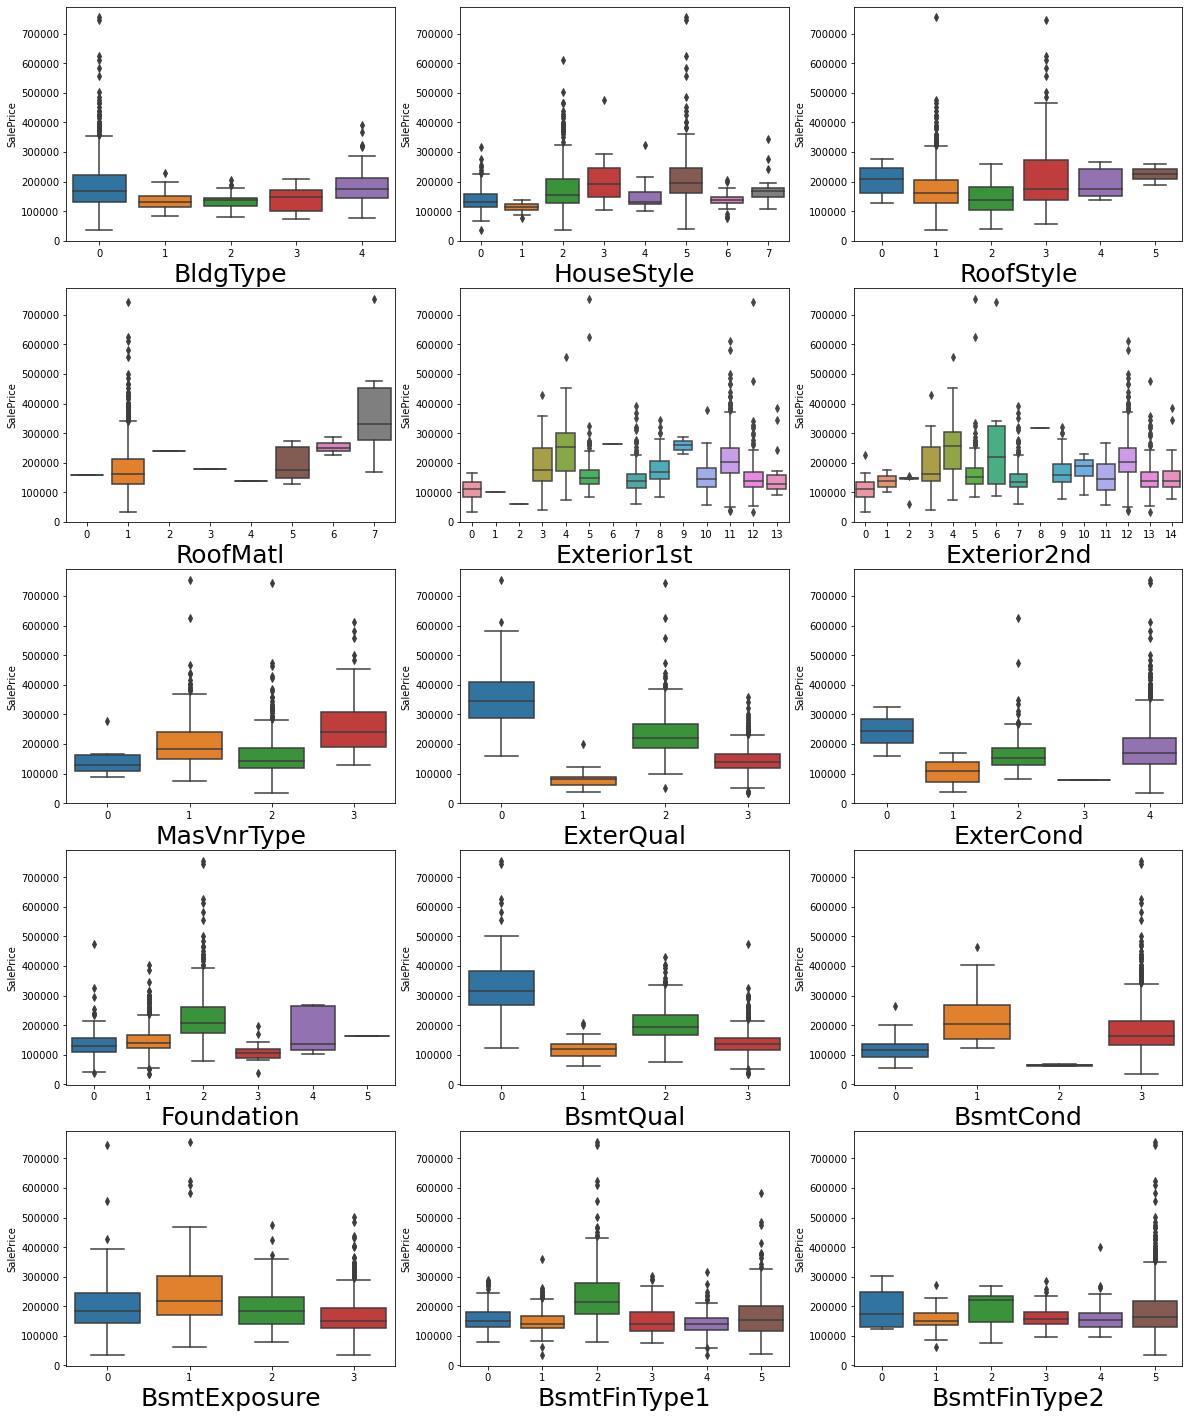

In [51]:
plt.figure(figsize=(20,25))
gr = 1
df2 = df.iloc[:,10:26]
for column in df2:
    if gr<=15:
        ax = plt.subplot(5,3,gr)
        sns.boxplot(x = df2[column],y=df['SalePrice'],data=df)
        plt.xlabel(column,fontsize=25)
    gr+=1
plt.show()

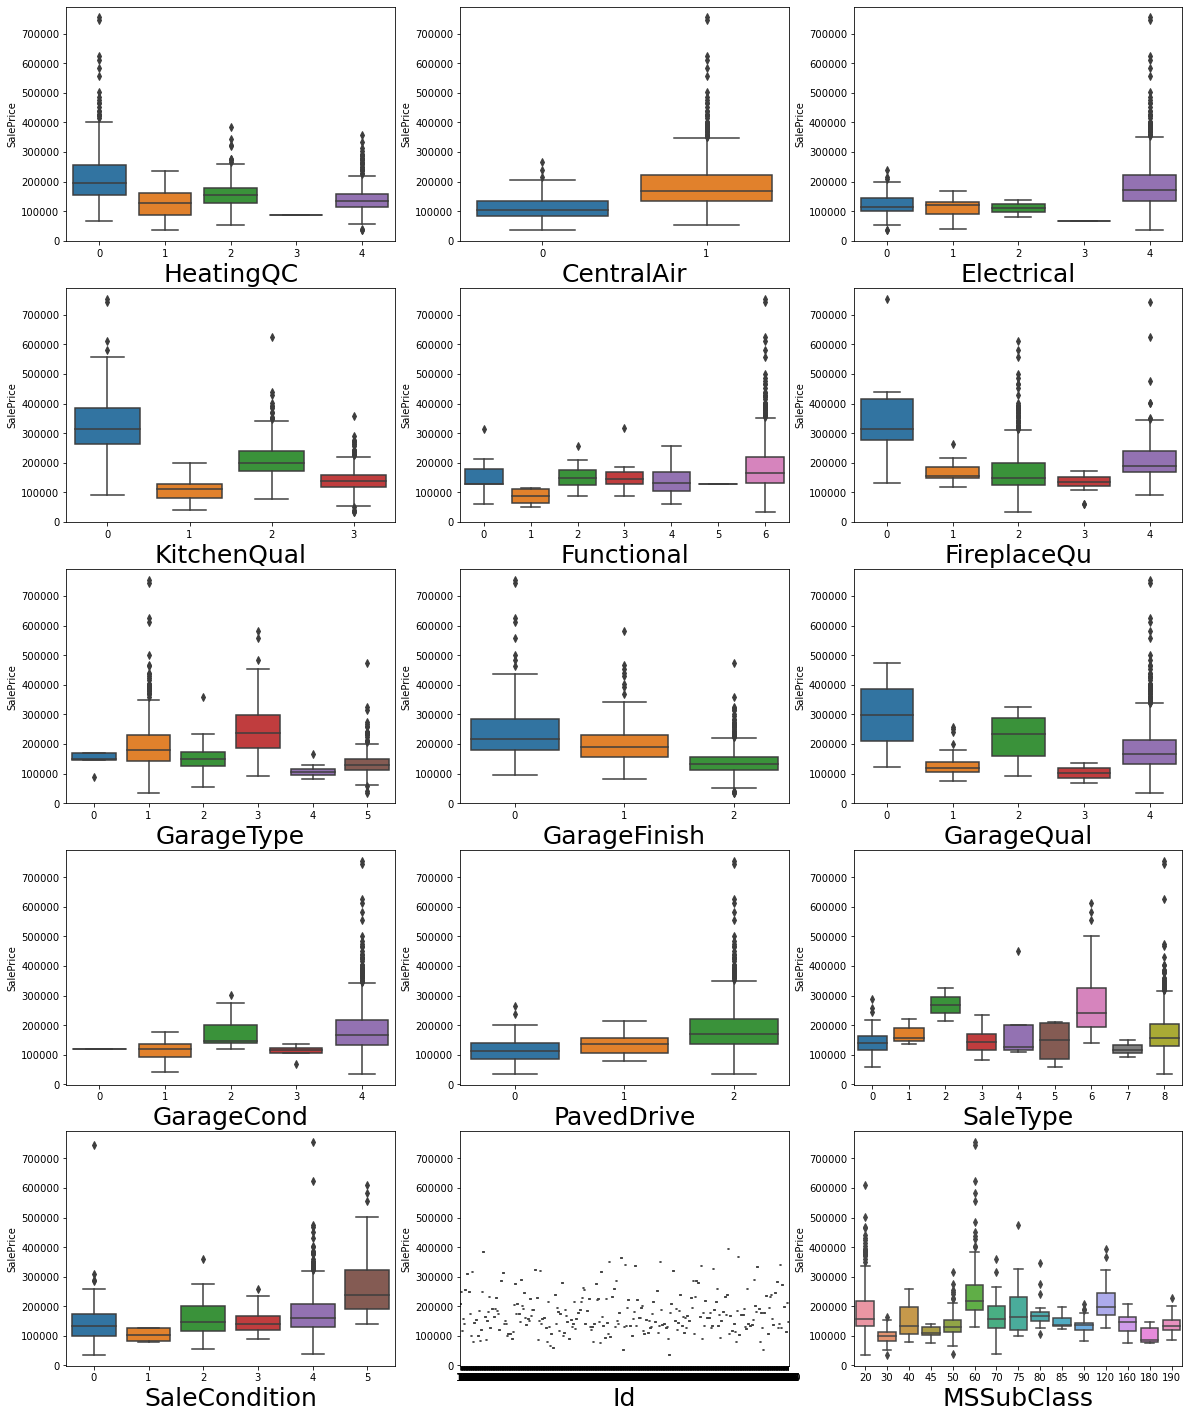

In [52]:
plt.figure(figsize=(20,25))
gr = 1
df3 = df.iloc[:,26:41]
for column in df3:
    if gr<=15:
        ax = plt.subplot(5,3,gr)
        sns.boxplot(x = df3[column],y=df['SalePrice'],data=df)
        plt.xlabel(column,fontsize=25)
    gr+=1
plt.show()

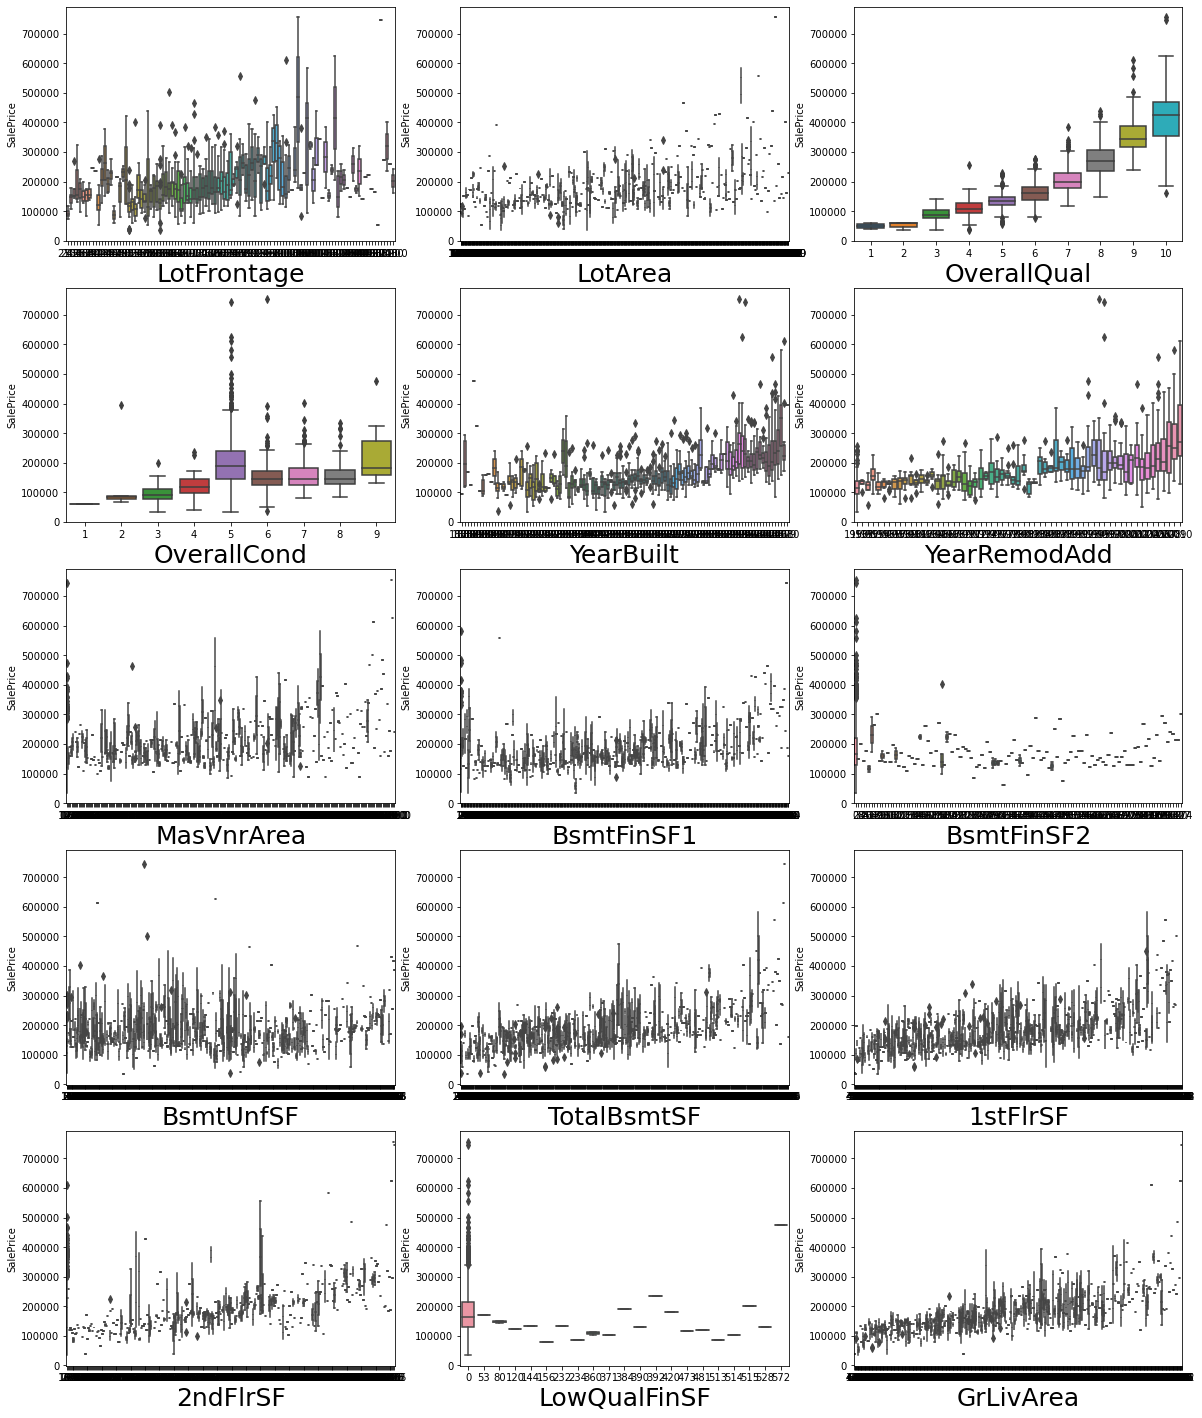

In [53]:
plt.figure(figsize=(20,25))
gr = 1
df4 = df.iloc[:,41:56]
for column in df4:
    if gr<=15:
        ax = plt.subplot(5,3,gr)
        sns.boxplot(x = df4[column],y=df['SalePrice'],data=df)
        plt.xlabel(column,fontsize=25)
    gr+=1
plt.show()

In [54]:
plt.figure(figsize=(20,25))
gr = 1
df4 = df.iloc[:,56:77]
for column in df4:
    if gr<=21:
        ax = plt.subplot(7,3,gr)
        sns.boxplot(x = df4[column],y=df['SalePrice'],data=df)
        plt.xlabel(column,fontsize=25)
    gr+=1
plt.show()

#### Outliers exists in the dataset

#### Checking Skewness

In [57]:
skewness = df.skew()
skewness.sort_values(ascending=True)

Street          -17.021969
GarageCond       -5.422472
GarageQual       -4.582386
Functional       -3.999663
SaleType         -3.660513
BsmtFinType2     -3.615783
CentralAir       -3.475188
BsmtCond         -3.293554
PavedDrive       -3.274035
LandContour      -3.125982
Electrical       -3.104209
SaleCondition    -2.671829
ExterCond        -2.516219
ExterQual        -1.810843
MSZoning         -1.796785
KitchenQual      -1.408106
BsmtQual         -1.343781
BsmtExposure     -1.166987
LotConfig        -1.118821
GarageYrBlt      -0.662934
Exterior1st      -0.612816
LotShape         -0.603775
Exterior2nd      -0.592349
YearBuilt        -0.579204
YearRemodAdd     -0.495864
GarageFinish     -0.450190
GarageCars       -0.358556
MasVnrType       -0.104609
BsmtFinType1     -0.068901
Foundation       -0.002761
Utilities         0.000000
Id                0.026526
Neighborhood      0.043735
FullBath          0.057809
YrSold            0.115765
OverallQual       0.175082
GarageArea        0.189665
M

#### dataset in highly skewed

#### Dropping Utilities as if doesn't have any correlation with SalePrice

In [11]:
df = df.drop(columns=['Utilities'],axis=1)
df.head(2)

MSZoning  Street  LotShape  LandContour  LotConfig  LandSlope  \
0         3       1         0            3          4          0   
1         3       1         0            3          4          1   

   Neighborhood  Condition1  Condition2  BldgType  ...  WoodDeckSF  \
0            13           2           2         4  ...           0   
1            12           2           2         0  ...          81   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0          205              0          0            0         0        0   
1          207              0          0          224         0        0   

   MoSold  YrSold  SalePrice  
0       2    2007     128000  
1      10    2007     268000  

[2 rows x 76 columns]

In [12]:
df = df.drop(columns=['Id'],axis=1)
df.head(2)

MSZoning  Street  LotShape  LandContour  LotConfig  LandSlope  \
0         3       1         0            3          4          0   
1         3       1         0            3          4          1   

   Neighborhood  Condition1  Condition2  BldgType  ...  WoodDeckSF  \
0            13           2           2         4  ...           0   
1            12           2           2         0  ...          81   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0          205              0          0            0         0        0   
1          207              0          0          224         0        0   

   MoSold  YrSold  SalePrice  
0       2    2007     128000  
1      10    2007     268000  

[2 rows x 75 columns]

#### Removing Outliers

In [13]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print("Old shape : ",z.shape)
print("---------------------------------------------------------")
print(z)
print("----------------------------------------------------------")
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]
df1 = df.drop(df.index[index])
print("-----------------------------------------------------------")
print("New shape : ",df1.shape)

Old shape :  (1168, 75)
---------------------------------------------------------
[[0.02164599 0.05862104 1.37310708 ... 1.61782184 0.60548713 0.67631017]
 [0.02164599 0.05862104 1.37310708 ... 1.3614701  0.60548713 1.09423443]
 [0.02164599 0.05862104 1.37310708 ... 0.12817587 0.60548713 1.11687211]
 ...
 [0.02164599 0.05862104 0.75205511 ... 0.24423562 0.8992128  0.41705186]
 [4.76211672 0.05862104 0.75205511 ... 0.24423562 0.14686284 1.78922393]
 [0.02164599 0.05862104 1.37310708 ... 0.12817587 1.3578371  0.02179027]]
----------------------------------------------------------
Row numbers :  [   1    1    1 ... 1166 1166 1166]
Column numbers :  [   1    1    1 ... 1166 1166 1166]
-----------------------------------------------------------
New shape :  (482, 75)


##### While removing outliers a large amount of data is lost, so keeping outliers as it is

#### Splitting the dataset into target and feature variable

In [14]:
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']

#### Removing Skewness

In [15]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[-0.16245555,  0.05862104, -1.36679351, ..., -0.19313254,
        -1.71943737, -0.60480623],
       [-0.16245555,  0.05862104, -1.36679351, ..., -0.19313254,
         1.32061233, -0.60480623],
       [-0.16245555,  0.05862104, -1.36679351, ..., -0.19313254,
        -0.07674981, -0.60480623],
       ...,
       [-0.16245555,  0.05862104,  0.7539072 , ..., -0.19313254,
         0.28887797,  0.89957552],
       [-2.92646435,  0.05862104,  0.7539072 , ..., -0.19313254,
         0.28887797,  0.14807039],
       [-0.16245555,  0.05862104, -1.36679351, ..., -0.19313254,
        -0.07674981, -1.3590026 ]])

In [16]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

MSZoning        0.233113
Street        -17.021969
LotShape       -0.594207
LandContour    -2.592303
LotConfig      -1.030401
                 ...    
ScreenPorch     3.067153
PoolArea       12.817372
MiscVal         4.991071
MoSold         -0.035838
YrSold          0.112893
Length: 74, dtype: float64

#### Still Skewness exists in the dataset

#### Scaling the dataset

In [17]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x_new)

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance covered")
plt.title("PCA")
plt.show()

In [19]:
pca = PCA(n_components=61)
principal = pca.fit_transform(X_scaled)
col = []
for i in range(0,61):
    col.append(i)
principal_x = pd.DataFrame(principal,columns=col)

In [20]:
principal_x.head(2)

0         1         2         3         4         5         6   \
0 -0.666277 -0.462772 -1.805109  0.903463 -1.169559 -0.002489  0.923507   
1  2.454569 -3.236146  4.290603 -0.796345  4.616554  2.464661  0.236274   

         7         8         9   ...        51        52        53        54  \
0 -0.029586 -0.294565 -0.931344  ... -0.575944  0.464951  0.226465  0.969511   
1  1.988236  1.436211 -4.799674  ...  0.219713  0.528269 -0.332774  1.146826   

         55        56        57        58        59        60  
0 -0.345829  0.143269  0.601284 -0.944319 -0.418541  0.569865  
1  1.169982  0.547640 -0.651517  0.414280 -1.156098 -0.770703  

[2 rows x 61 columns]

#### Finding the best random state

In [21]:
from sklearn.linear_model import LinearRegression
max_accuracy = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    accu_score = lr.score(x_train,y_train)
    if accu_score>max_accuracy:
        max_accuracy = accu_score
        max_rs = i
print("Maximum accuracy is",max_accuracy,"when",max_rs,"is the random state")

Maximum accuracy is 0.8660532711487103 when 77 is the random state


#### 77 is the best Random state

#### Splitting the dataset into train and test

In [22]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = 77)   

#### Model Training

#### i) Linear Regression

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Score in training dataset = ",lr.score(x_train,y_train))
print("Score in testing dataset = ",lr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score : ",r2_score(y_test,y_pred))

Score in training dataset =  0.8660532711487103
Score in testing dataset =  0.6434235238245081
MAE is :  26153.279501527566
MSE is : 2513121446.7232814
RMSE is : 50131.04274522206
R2 score :  0.6434235238245081


#### Linear Regression works with an accuracy of 64.34%

#### ii) Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Score in training dataset is ",dt.score(x_train,y_train))
print("Score in testing dataset is ",dt.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_dt))
print("MSE is :",mean_squared_error(y_test,y_pred_dt))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print("R2 score : ",r2_score(y_test,y_pred_dt))

Score in training dataset is  1.0
Score in testing dataset is  0.6317573491356137
MAE is :  30461.719178082192
MSE is : 2595343678.89726
RMSE is : 50944.515690084445
R2 score :  0.6317573491356137


#### Decision tree works with an accuracy of 63.18%

#### iii) Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score in training dataset is ",rf.score(x_train,y_train))
print("Score in testing dataset is ",rf.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE is :",mean_squared_error(y_test,y_pred_rf))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R2 score : ",r2_score(y_test,y_pred_rf))

Score in training dataset is  0.978038350198103
Score in testing dataset is  0.7738257694671267
MAE is :  22210.16065068493
MSE is : 1594057228.7459462
RMSE is : 39925.64625332878
R2 score :  0.7738257694671267


#### Random Forest Regressor works with an accuracy of 77.38%

#### iv) Gradient Descent Boosting 

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in training dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_gbr))
print("MSE is :",mean_squared_error(y_test,y_pred_gbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

Score in training dataset is  0.9782636374243294
Score in training dataset is  0.8264942481969535
MAE is :  20435.724450346515
MSE is : 1222854156.4572577
RMSE is : 34969.33165585608


#### Gradient Descent Boosting works with an accuracy of 82.65%

#### v) XGBoost

In [31]:
import xgboost as xgb
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
y_pred_xgbr = xgbr.predict(x_test)
print("Score in training dataset is ",xgbr.score(x_train,y_train))
print("Score in training dataset is ",xgbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_xgbr))
print("MSE is :",mean_squared_error(y_test,y_pred_xgbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))
print("R2 score : ",r2_score(y_test,y_pred_xgbr))

Score in training dataset is  0.9999995055318442
Score in training dataset is  0.8212951361218329
MAE is :  21095.203379173803
MSE is : 1259497067.3975554
RMSE is : 35489.393731050906
R2 score :  0.8212951361218329


#### XGBR works with an accuracy of 82.13%

#### Finding the  Cross-validation Score

In [34]:
from sklearn.model_selection import GridSearchCV,cross_val_score
cvs = cross_val_score(lr,principal_x,y,cv=5)
print("Cross validation score of Linear Regression model is : ",cvs.mean())

Cross validation score of Linear Regression model is :  0.7611974927904406


In [35]:
cvs = cross_val_score(dt,principal_x,y,cv=5)
print("Cross validation score of DecisionTreeRegressor model is : ",cvs.mean())

Cross validation score of DecisionTreeRegressor model is :  0.7160350956158308


In [36]:
cvs = cross_val_score(rf,principal_x,y,cv=5)
print("Cross validation score of Random forest model is : ",cvs.mean())

Cross validation score of Random forest model is :  0.8246387994997795


In [37]:
cvs = cross_val_score(gbr,principal_x,y,cv=5)
print("Cross validation score of GradientDescent Boosting model is : ",cvs.mean())

Cross validation score of GradientDescent Boosting model is :  0.856371750857155


In [38]:
cvs = cross_val_score(xgbr,principal_x,y,cv=5)
print("Cross validation score of XGBRegressor model is : ",cvs.mean())

Cross validation score of XGBRegressor model is :  0.8406903430805895


#### Finding the best model

In [39]:
models = pd.DataFrame([['Linear Regressor','64.34','76.12','11.78'],["DecisionTreeRegressor","63.18","71.60","8.42"],["RandomForestRegressor","77.38","82.46","5.08"],["GradientBoostingRegressor","82.65","85.64","2.99"],["XGBRegressor","82.19","84.07","1.88"]],columns=["Model","Score","Cross Validation Score","Difference"])
models

Model  Score Cross Validation Score Difference
0           Linear Regressor  64.34                  76.12      11.78
1      DecisionTreeRegressor  63.18                  71.60       8.42
2      RandomForestRegressor  77.38                  82.46       5.08
3  GradientBoostingRegressor  82.65                  85.64       2.99
4               XGBRegressor  82.19                  84.07       1.88

#### XGBoost Regressor turns out to be the best model as the difference is least

##### Hyper Parameter Tuning

In [68]:
params = {'learning_rate':np.arange(0.151,0.231),
          'n_estimators':[10,80,10],
          'max_depth':[12,14],
          'min_samples_leaf':[1,10,2]
         }
grid = GridSearchCV(estimator = xgbr,param_grid = params,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

[12:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best Parameters are 
 {'learning_rate': 0.151, 'max_depth': 14, 'min_samples_leaf': 1, 'n_estimators': 80}


In [69]:
xgbr = XGBRegressor(learning_rate=0.151,max_depth=14,min_samples_leaf=1,n_estimators=80)
xgbr.fit(x_train,y_train)
y_pred = xgbr.predict(x_test)
print("Score in training dataset is ",xgbr.score(x_train,y_train))
print("Score in testing dataset is ",xgbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score : ",r2_score(y_test,y_pred))

[12:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Score in training dataset is  0.9999996663752716
Score in testing dataset is  0.8241023599515372
MAE is :  21100.225398651542
MSE is : 1239711986.5423882
RMSE is : 35209.54396953173
R2 score :  0.8241023599515372


#### After Hyper Parameter tuning XGBoost works with an accuracy of 82.41%

#### Loading Test data set

In [70]:
dt = pd.read_csv("test.csv")
dt.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  

[3 rows x 80 columns]

In [72]:
pd.set_option('display.max_rows',None)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

#### Dataset have null values, so handling them in the same way as I did for train dataset

In [73]:
dt = dt.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],axis = 1)
dt.shape

(292, 76)

In [74]:
dt["LotFrontage"] = dt['LotFrontage'].fillna(dt['LotFrontage'].mean())
dt["MasVnrArea"] = dt['MasVnrArea'].fillna(dt['MasVnrArea'].mean())
dt["GarageYrBlt"] = dt['GarageYrBlt'].fillna(dt['GarageYrBlt'].mean())

dt["MasVnrType"] = dt["MasVnrType"].fillna(dt["MasVnrType"].mode()[0])
dt["BsmtQual"] = dt["BsmtQual"].fillna(dt["BsmtQual"].mode()[0])
dt["BsmtCond"] = dt["BsmtCond"].fillna(dt["BsmtCond"].mode()[0])
dt["BsmtExposure"] = dt["BsmtExposure"].fillna(dt["BsmtExposure"].mode()[0])
dt["BsmtFinType1"] = dt["BsmtFinType1"].fillna(dt["BsmtFinType1"].mode()[0])
dt["BsmtFinType2"] = dt["BsmtFinType2"].fillna(dt["BsmtFinType2"].mode()[0])
dt["FireplaceQu"] = dt["FireplaceQu"].fillna(dt["FireplaceQu"].mode()[0])
dt["GarageType"] = dt["GarageType"].fillna(dt["GarageType"].mode()[0])
dt["GarageFinish"] = dt["GarageFinish"].fillna(dt["GarageFinish"].mode()[0])
dt["GarageQual"] = dt["GarageQual"].fillna(dt["GarageQual"].mode()[0])
dt["GarageCond"] = dt["GarageCond"].fillna(dt["GarageCond"].mode()[0])

#### Splitting categorical and numerical columns

In [75]:
catcolumns = [column for column in dt.columns if dt[column].dtype=='object']
numcolumns = [column for column in dt.columns if dt[column].dtype!='object']
print("------------------- Categorical Columns------------------------------")
categorical = dt[catcolumns]
print(categorical.head(2))

------------------- Categorical Columns------------------------------
  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      IR1         HLS    AllPub    Corner       Gtl   
1       RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      StoneBr       Norm       Norm  ...          Gd        Typ          Gd   
1      StoneBr       Norm       Norm  ...          Gd        Typ          Ex   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          Fin         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y      COD   

  SaleCondition  
0        Normal  
1       Abnorml  

[2 rows x 39 columns]


In [76]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for i in catcolumns:
    categorical[i]=lab_enc.fit_transform(categorical[i])
categorical.head(3)

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         2       1         0            1          0          0          0   
1         2       1         0            3          0          1          0   
2         2       1         3            3          0          4          0   

   Neighborhood  Condition1  Condition2  ...  KitchenQual  Functional  \
0            21           2           0  ...            2           5   
1            21           2           0  ...            2           5   
2             4           2           0  ...            0           5   

   FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0            2           1             0           4           4           2   
1            0           1             1           4           4           2   
2            4           1             1           4           4           2   

   SaleType  SaleCondition  
0         5              2  
1         0              0  
2         5              2  

[3 rows x 39 columns]

In [77]:
numerical = dt[numcolumns]

In [78]:
dt = pd.concat([categorical,numerical],axis=1)
dt.head(3)

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         2       1         0            1          0          0          0   
1         2       1         0            3          0          1          0   
2         2       1         3            3          0          4          0   

   Neighborhood  Condition1  Condition2  ...  GarageArea  WoodDeckSF  \
0            21           2           0  ...         676         178   
1            21           2           0  ...         565          63   
2             4           2           0  ...         522         202   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           51              0          0            0         0        0   
1            0              0          0            0         0        0   
2          151              0          0            0         0        0   

   MoSold  YrSold  
0       7    2007  
1       8    2009  
2       6    2009  

[3 rows x 76 columns]

#### Checking skewness

In [79]:
dt.skew()

MSZoning          0.187174
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.639043
Neighborhood      0.046894
Condition1        2.808950
Condition2       17.088007
BldgType          1.997202
HouseStyle        0.386773
RoofStyle         1.386333
RoofMatl         13.717569
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinType2     -3.702330
Heating           8.212666
HeatingQC         0.408904
CentralAir       -3.792878
Electrical       -2.955201
KitchenQual      -1.493903
Functional       -4.911353
FireplaceQu       0.962674
GarageType        0.948083
GarageFinish     -0.403944
GarageQual       -4.631453
GarageCond       -5.583300
PavedDrive       -3.474356
S

In [80]:
dt = dt.drop(columns=['Utilities','Id'],axis=1)
dt.head(2)

MSZoning  Street  LotShape  LandContour  LotConfig  LandSlope  \
0         2       1         0            1          0          0   
1         2       1         0            3          1          0   

   Neighborhood  Condition1  Condition2  BldgType  ...  GarageArea  \
0            21           2           0         0  ...         676   
1            21           2           0         4  ...         565   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0         178           51              0          0            0         0   
1          63            0              0          0            0         0   

   MiscVal  MoSold  YrSold  
0        0       7    2007  
1        0       8    2009  

[2 rows x 74 columns]

#### Skewness exists in the dataset

In [81]:
dt_new = power_transform(dt,method='yeo-johnson')
dt_new

array([[-0.28316498,  0.08304548, -1.39266684, ..., -0.18831089,
         0.31891002, -0.65028987],
       [-0.28316498,  0.08304548, -1.39266684, ..., -0.18831089,
         0.66106266,  0.8638488 ],
       [-0.28316498,  0.08304548,  0.74888027, ..., -0.18831089,
        -0.03386305,  0.8638488 ],
       ...,
       [-0.28316498,  0.08304548, -1.39266684, ...,  5.31036722,
        -1.17947548,  1.61904342],
       [ 1.7993534 ,  0.08304548,  0.74888027, ..., -0.18831089,
         1.31899998, -1.40924184],
       [ 1.7993534 ,  0.08304548,  0.74888027, ..., -0.18831089,
        -0.03386305, -1.40924184]])

In [82]:
dt_new = pd.DataFrame(dt_new,columns=dt.columns)
dt_new.skew()

MSZoning          0.133712
Street          -12.020386
LotShape         -0.623034
LandContour      -2.829769
LotConfig        -1.045888
LandSlope         4.085599
Neighborhood     -0.157737
Condition1        0.280614
Condition2       17.088007
BldgType          1.662617
HouseStyle       -0.067515
RoofStyle        -0.472902
RoofMatl         12.020386
Exterior1st      -0.281575
Exterior2nd      -0.364171
MasVnrType       -0.025474
ExterQual        -0.700849
ExterCond        -2.512541
Foundation        0.058252
BsmtQual         -0.458413
BsmtCond         -4.085599
BsmtExposure     -1.011543
BsmtFinType1     -0.168838
BsmtFinType2     -2.582706
Heating           6.256238
HeatingQC         0.217769
CentralAir       -3.792878
Electrical       -0.315323
KitchenQual      -0.505401
Functional       -3.793144
FireplaceQu       0.040178
GarageType        0.205440
GarageFinish     -0.319091
GarageQual       -4.253614
GarageCond       -5.148542
PavedDrive       -3.143668
SaleType         -3.059359
S

##### Scaling the data

In [83]:
scale = StandardScaler()
dt_scaled = scale.fit_transform(dt_new)

#### Applying PCA

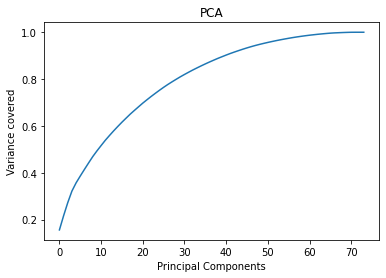

In [84]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(dt_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance covered")
plt.title("PCA")
plt.show()

In [85]:
pca = PCA(n_components=61)
principal = pca.fit_transform(dt_scaled)
col = []
for i in range(0,61):
    col.append(i)
principal_dt = pd.DataFrame(principal,columns=col)

#### Making prediction

In [86]:
prediction = xgbr.predict(principal_dt)

In [87]:
predict=pd.DataFrame({'SalePrice':prediction})
predict

SalePrice
0    380244.218750
1    186985.828125
2    270781.906250
3    158609.687500
4    283055.281250
5     54720.640625
6    134841.312500
7    309329.968750
8    208644.328125
9    160191.734375
10    53189.207031
11   165706.750000
12   134972.718750
13   228243.500000
14   325112.843750
15   139115.703125
16   118775.289062
17   119172.562500
18   189562.578125
19   172644.156250
20   133682.828125
21   163794.171875
22   144202.468750
23    94737.500000
24    99874.773438
25   124690.140625
26   178074.859375
27   153800.328125
28   147571.781250
29    97106.109375
30   152894.390625
31   202337.546875
32   259060.093750
33   157032.625000
34   112076.085938
35   175379.765625
36   166110.437500
37   121175.632812
38   128446.523438
39   140754.750000
40   113276.687500
41   263177.781250
42   214665.312500
43   206632.140625
44   153428.000000
45   123007.703125
46   130804.632812
47   100471.242188
48   243959.312500
49   347898.500000
50   180844.671875
51   175070.140625
52   112289.242188
53    78627.343750
54   256755.359375
55   105841.242188
56   135924.640625
57   205170.140625
58   122864.039062
59   252991.109375
60   120773.429688
61   171968.093750
62   153603.031250
63   151926.046875
64   242719.718750
65   102511.046875
66   169489.218750
67   204916.734375
68   139135.359375
69   196097.921875
70   318612.156250
71   211136.859375
72   139348.781250
73   203459.265625
74   143100.921875
75   219737.296875
76   313458.281250
77   184921.328125
78   297290.906250
79   151537.156250
80   197280.234375
81   153985.843750
82   220138.984375
83   156326.078125
84   166382.578125
85   250412.140625
86   106294.781250
87   307962.625000
88   147704.906250
89   185593.984375
90   323461.218750
91   134847.671875
92   131426.953125
93   137394.640625
94   191810.703125
95   167600.125000
96   218479.875000
97   176642.281250
98   368467.875000
99   128239.046875
100  238866.687500
101  109770.773438
102  130903.843750
103  190418.218750
104  184800.953125
105  124567.203125
106  181691.578125
107  164640.328125
108  225375.078125
109  202374.484375
110  208155.546875
111  172169.312500
112  157308.109375
113  282891.656250
114  130677.312500
115  111597.906250
116  131527.843750
117  181287.234375
118  148010.453125
119  123196.664062
120  108456.710938
121  283396.500000
122  217486.000000
123  150599.515625
124  151803.453125
125  185963.031250
126  125163.906250
127  155001.234375
128   68194.937500
129  111202.804688
130  139801.187500
131  219938.515625
132  135726.890625
133  132721.156250
134  162674.984375
135  317255.625000
136  217370.593750
137  126647.718750
138  295505.750000
139  109937.437500
140  133761.593750
141  560913.875000
142  104960.781250
143  384175.031250
144  161143.031250
145  211389.375000
146  114422.679688
147  148464.796875
148   95061.437500
149  210202.187500
150  225964.843750
151  133693.031250
152  189063.031250
153  124104.328125
154  102301.914062
155  150146.265625
156  191355.687500
157  172752.031250
158  121169.460938
159  178687.640625
160  200968.843750
161  135962.750000
162  180083.687500
163  125389.875000
164  118825.789062
165  279378.125000
166  181094.187500
167  215057.812500
168  125684.570312
169  207175.015625
170  162909.734375
171  127701.921875
172  125404.070312
173  291557.000000
174  133552.187500
175  284409.937500
176  112195.953125
177  103300.953125
178  145746.125000
179  188229.218750
180  200478.281250
181  155716.234375
182  310647.281250
183  179734.187500
184  532588.437500
185  370433.031250
186  170780.625000
187  100361.554688
188  165589.296875
189  141546.078125
190   95198.726562
191  205153.781250
192  222645.578125
193   92024.445312
194  139742.390625
195   73063.500000
196  164288.406250
197  215475.109375
198  104933.171875
199  211834.375000
200  145303.484375
201  113825.101562
202  213118.437500
203  287334.281250
204  135696.906250
205  122164.992188
206  279457.750000
207  165900.546875
208  144592.093750
209  168916.296875


In [88]:
data = pd.concat([dt,predict],axis=1)
data.head(2)

MSZoning  Street  LotShape  LandContour  LotConfig  LandSlope  \
0         2       1         0            1          0          0   
1         2       1         0            3          1          0   

   Neighborhood  Condition1  Condition2  BldgType  ...  WoodDeckSF  \
0            21           2           0         0  ...         178   
1            21           2           0         4  ...          63   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           51              0          0            0         0        0   
1            0              0          0            0         0        0   

   MoSold  YrSold      SalePrice  
0       7    2007  380244.218750  
1       8    2009  186985.828125  

[2 rows x 75 columns]

#### Saving as a .csv file 

In [89]:
data.to_csv("House Price Prediction.csv")

#### Saving the model

In [90]:
import pickle
filename = 'House Price Prediction.pkl'
pickle.dump(xgbr,open(filename,'wb'))